# Введение в искусственные нейронные сети
# Урок 4. Сверточные нейронные сети


Вариант 1. (простой)

- обучить сверточную нейронную сеть в стиле AlexNet (с падением размера ядра свертки и последовательностью блоков свертка-пулинг  (conv-pool)-(conv-pool)-...) на датасете fashion-mnist или cifar10
- оценить рост точности при увеличении ширины сети (больше ядер)
- оценить рост точности при увеличении глубины сети (больше слоев)
- (опциционально)сравнить с точностью полносвязной сети для этой выборки
    </li>



In [1]:
from __future__ import print_function

import tensorflow
import tensorflow.keras as keras
from tensorflow.keras import models

from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout, AveragePooling2D, Activation, MaxPooling2D


#import tensorflow.keras as keras # расскоментируйте эту строку, чтобы начать обучение
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt
import os

In [2]:
classes=['самолет', 'автомобиль', 'птица', 'кот', 'олень', 'собака', 'лягушка', 'лошадь', 'корабль', 'грузовик']

# установка параметров нейросети
batch_size = 64
num_classes = 10
epochs = 1
# data_augmentation = False
# num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5'

# разделение тренировочной и тестовой выборки
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'тренировочные примеры')
print(x_test.shape[0], 'тестовые примеры')

# преобразование матрицы чисел 0-9 в бинарную матрицу чисел 0-1
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

x_train shape: (50000, 32, 32, 3)
50000 тренировочные примеры
10000 тестовые примеры


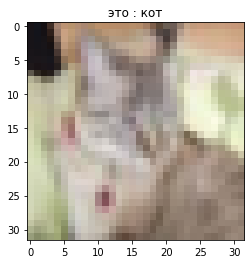

In [3]:
import numpy as np
N = 8

plt.imshow(x_test[N][:,:,:])
plt.title('это : '+classes[np.argmax(y_test[N,:])])
plt.show()

In [4]:
def get_plot(history): 
    fig, axs = plt.subplots(1, 2, figsize=(20, 4)) 

    axs[0].plot(history.history['accuracy'], 'r') 
    axs[0].plot(history.history['val_accuracy'],'b') 
    axs[0].set_title('Accuracy of epochs')
    axs[0].set_ylabel('Accuracy') 
    axs[0].set_xlabel('Epochs')
    axs[0].legend(['train', 'validate'], loc='upper left')
    axs[0].grid()

    axs[1].plot(history.history['loss'], 'r') 
    axs[1].plot(history.history['val_loss'], 'b')
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss') 
    axs[1].set_xlabel('Epochs')
    axs[1].legend(['train', 'validate'], loc='upper left')
    plt.grid()
    plt.show()
    
def get_result_test(model, x_train, y_train_cat, x_test, y_test_cat):
    score_train = model.evaluate(x_train, y_train_cat, verbose=0)
    score_test = model.evaluate(x_test, y_test_cat, verbose=0)
    print('Train loss:', score_train[0])
    print('Train accuracy:', score_train[1])
    print('Test loss:', score_test[0])
    print('Test accuracy:', score_test[1])

In [5]:
model1 = Sequential([
    Conv2D(filters=32, kernel_size=(4, 4), input_shape=(32, 32, 3), activation='relu'),
    MaxPool2D(pool_size=(2, 2)),
    Conv2D(filters=32, kernel_size=(4, 4), input_shape=(32, 32, 3), activation='relu'),
    MaxPool2D(pool_size=(2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dense(10, activation='softmax')
])

model1.compile(optimizer='adam',
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])

history = model1.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))


Epoch 1/5
1563/1563 [==============================] - 33s 21ms/step - loss: 1.4897 - accuracy: 0.4624 - val_loss: 1.2329 - val_accuracy: 0.5621
Epoch 2/5
1563/1563 [==============================] - 31s 20ms/step - loss: 1.1579 - accuracy: 0.5924 - val_loss: 1.1157 - val_accuracy: 0.6066
Epoch 3/5
1563/1563 [==============================] - 31s 20ms/step - loss: 1.0060 - accuracy: 0.6484 - val_loss: 1.0222 - val_accuracy: 0.6441
Epoch 4/5
1563/1563 [==============================] - 30s 19ms/step - loss: 0.9013 - accuracy: 0.6851 - val_loss: 1.0112 - val_accuracy: 0.6522
Epoch 5/5
1563/1563 [==============================] - 32s 20ms/step - loss: 0.8151 - accuracy: 0.7137 - val_loss: 0.9686 - val_accuracy: 0.6726


In [6]:
get_result_test(model1, x_train, y_train, x_test, y_test)

Train loss: 0.7149900197982788
Train accuracy: 0.7506999969482422
Test loss: 0.9686161875724792
Test accuracy: 0.6725999712944031


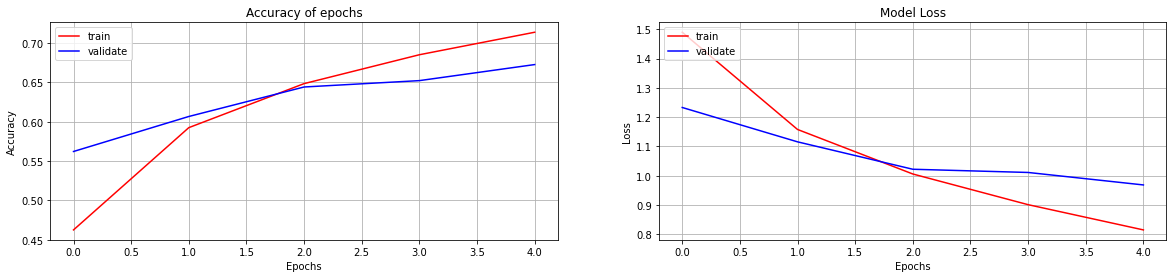

In [7]:
get_plot(history)

In [8]:
model2 = Sequential([
    Conv2D(filters=32, kernel_size=(4, 4), input_shape=(32, 32, 3), activation='relu'),
    MaxPool2D(pool_size=(2, 2)),
    Dropout(0.25), 
    Conv2D(filters=32, kernel_size=(4, 4), input_shape=(32, 32, 3), activation='relu'),
    MaxPool2D(pool_size=(2, 2)),
    Dropout(0.25),
    Flatten(),
    Dense(256, activation='relu'),
    Dense(10, activation='softmax')
])
model2.compile(optimizer='adam',
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])

history2 = model2.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5
1563/1563 [==============================] - 36s 23ms/step - loss: 1.5755 - accuracy: 0.4264 - val_loss: 1.2617 - val_accuracy: 0.5469
Epoch 2/5
1563/1563 [==============================] - 34s 22ms/step - loss: 1.2520 - accuracy: 0.5568 - val_loss: 1.1247 - val_accuracy: 0.6040
Epoch 3/5
1563/1563 [==============================] - 33s 21ms/step - loss: 1.1210 - accuracy: 0.6057 - val_loss: 1.0676 - val_accuracy: 0.6320
Epoch 4/5
1563/1563 [==============================] - 34s 22ms/step - loss: 1.0265 - accuracy: 0.6398 - val_loss: 0.9717 - val_accuracy: 0.6608
Epoch 5/5
1563/1563 [==============================] - 34s 22ms/step - loss: 0.9546 - accuracy: 0.6672 - val_loss: 0.9257 - val_accuracy: 0.6777


In [9]:
get_result_test(model2, x_train, y_train, x_test, y_test)

Train loss: 0.7668190002441406
Train accuracy: 0.741919994354248
Test loss: 0.9256700277328491
Test accuracy: 0.6776999831199646


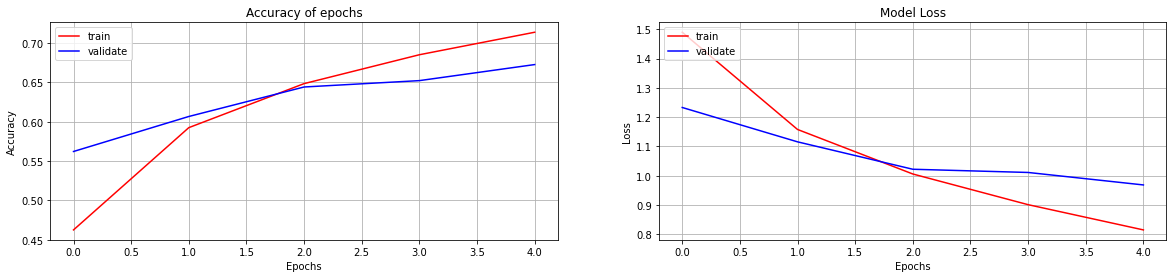

In [10]:
get_plot(history2)

In [11]:
model3 = Sequential([
    Conv2D(filters=64, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu'),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    MaxPool2D(pool_size=(2, 2)),
    Dropout(0.25),
    
    Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
    Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
    MaxPool2D(pool_size=(2, 2)),
    Dropout(0.25),
    
    Flatten(),
    Dense(1024, activation='relu'),
    Dense(1024, activation='relu'),
    Dense(10, activation='softmax')
])

model3.compile(optimizer='adam',
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])

history3 = model3.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5
1563/1563 [==============================] - 264s 168ms/step - loss: 1.5410 - accuracy: 0.4354 - val_loss: 1.2026 - val_accuracy: 0.5656
Epoch 2/5
1563/1563 [==============================] - 269s 172ms/step - loss: 1.1271 - accuracy: 0.5984 - val_loss: 1.0043 - val_accuracy: 0.6460
Epoch 3/5
1563/1563 [==============================] - 275s 176ms/step - loss: 0.9305 - accuracy: 0.6726 - val_loss: 0.8338 - val_accuracy: 0.7070
Epoch 4/5
1563/1563 [==============================] - 270s 173ms/step - loss: 0.8091 - accuracy: 0.7157 - val_loss: 0.8103 - val_accuracy: 0.7184
Epoch 5/5
1563/1563 [==============================] - 265s 170ms/step - loss: 0.7222 - accuracy: 0.7448 - val_loss: 0.7873 - val_accuracy: 0.7255


In [12]:
get_result_test(model3, x_train, y_train, x_test, y_test)

Train loss: 0.5616425275802612
Train accuracy: 0.8023399710655212
Test loss: 0.7873474359512329
Test accuracy: 0.7254999876022339


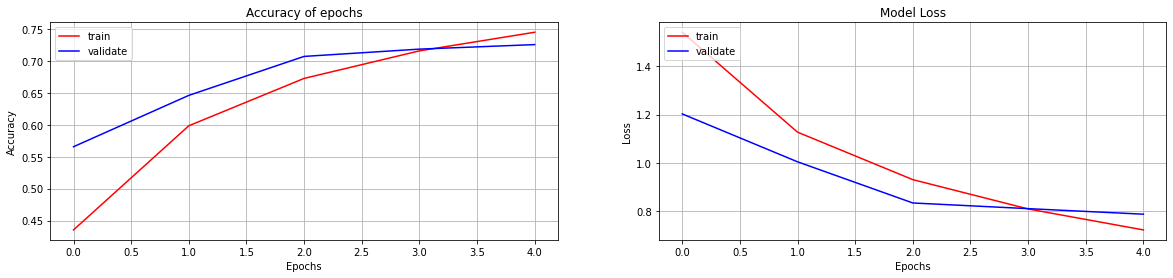

In [13]:
get_plot(history3)

In [14]:
# усложним 
#TO:DO (лучше обучать на GPU)
model4 = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), input_shape=(32, 32, 3), kernel_initializer='he_uniform', padding='same',
           activation='relu'),
    Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu'),
    MaxPool2D(pool_size=(2, 2)),
    Dropout(0.25), 
    
    Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'),
    Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'),
    MaxPool2D(pool_size=(2, 2)),
    Dropout(0.25), 
    
    Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu'),
    Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu'),
    MaxPool2D(pool_size=(2, 2)),
    Dropout(0.25), 
    
    Flatten(),
    Dense(128, activation='relu', kernel_initializer='he_uniform'),
    Dropout(0.25), 
    Dense(10, activation='softmax')
])

model4.compile(optimizer='adam',
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])

history4 = model4.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5
1563/1563 [==============================] - 186s 119ms/step - loss: 1.6362 - accuracy: 0.3908 - val_loss: 1.2373 - val_accuracy: 0.5528
Epoch 2/5
1563/1563 [==============================] - 193s 123ms/step - loss: 1.1749 - accuracy: 0.5826 - val_loss: 1.0162 - val_accuracy: 0.6416
Epoch 3/5
1563/1563 [==============================] - 193s 123ms/step - loss: 1.0089 - accuracy: 0.6453 - val_loss: 0.9555 - val_accuracy: 0.6679
Epoch 4/5
1563/1563 [==============================] - 192s 123ms/step - loss: 0.9140 - accuracy: 0.6796 - val_loss: 0.8173 - val_accuracy: 0.7190
Epoch 5/5
1563/1563 [==============================] - 193s 124ms/step - loss: 0.8430 - accuracy: 0.7046 - val_loss: 0.8084 - val_accuracy: 0.7254


In [15]:
get_result_test(model4, x_train, y_train, x_test, y_test)

Train loss: 0.6837185025215149
Train accuracy: 0.7611600160598755
Test loss: 0.8083974123001099
Test accuracy: 0.7253999710083008


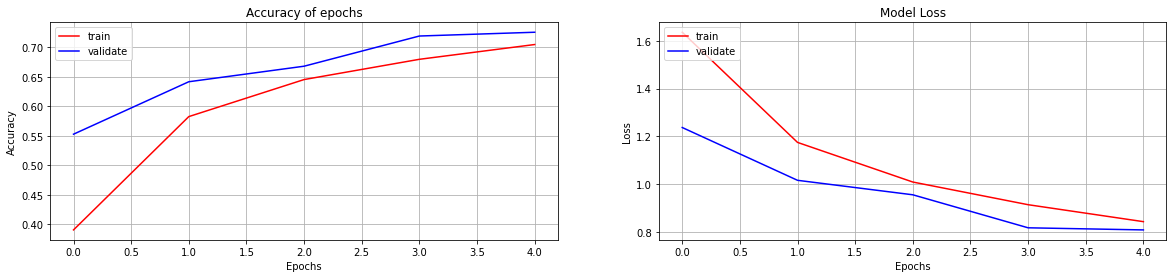

In [16]:
get_plot(history4)

In [17]:
#Попробуем ускорить работу на CPU с помощью
from tensorflow.keras.layers import BatchNormalization

model5 = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), input_shape=(32, 32, 3), kernel_initializer='he_uniform', padding='same',
           activation='relu'),
    BatchNormalization(),
    Conv2D(filters=32, kernel_size=(3, 3), kernel_initializer='he_uniform', padding='same', activation='relu'),
    BatchNormalization(),
    MaxPool2D(pool_size=(2, 2)),
    Dropout(0.25), 
    
    Conv2D(filters=64, kernel_size=(3, 3), kernel_initializer='he_uniform', padding='same', activation='relu'),
    BatchNormalization(),
    Conv2D(filters=64, kernel_size=(3, 3), kernel_initializer='he_uniform', padding='same', activation='relu'),
    BatchNormalization(),
    MaxPool2D(pool_size=(2, 2)),
    Dropout(0.25), 
    
    Conv2D(filters=128, kernel_size=(3, 3), kernel_initializer='he_uniform', padding='same', activation='relu'),
    BatchNormalization(),
    Conv2D(filters=128, kernel_size=(3, 3), kernel_initializer='he_uniform', padding='same', activation='relu'),
    BatchNormalization(),
    MaxPool2D(pool_size=(2, 2)),
    Dropout(0.25), 
    
    Flatten(),
    Dense(256, activation='relu', kernel_initializer='he_uniform'),
    BatchNormalization(),
    Dropout(0.25), 
    Dense(10, activation='softmax')
])

model5.compile(optimizer='adam',
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])

datagen = ImageDataGenerator(
                            rotation_range=15,
                            width_shift_range=0.1,
                            height_shift_range=0.1,
                            horizontal_flip=True,
                            vertical_flip=False
                            )
datagen.fit(x_train)

history5 = model5.fit_generator(datagen.flow(x_train, y_train, batch_size = 64),
                                 validation_data = (x_test, y_test),
                                 steps_per_epoch = x_train.shape[0] // 64, 
                                 epochs = 5)


C:\ProgramData\Anaconda3\envs\start_R\lib\site-packages\ipykernel_launcher.py:50: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/5
781/781 [==============================] - 208s 265ms/step - loss: 1.5813 - accuracy: 0.4423 - val_loss: 1.4191 - val_accuracy: 0.5366
Epoch 2/5
781/781 [==============================] - 213s 273ms/step - loss: 1.1567 - accuracy: 0.5852 - val_loss: 1.0385 - val_accuracy: 0.6450
Epoch 3/5
781/781 [==============================] - 225s 288ms/step - loss: 0.9846 - accuracy: 0.6503 - val_loss: 0.9079 - val_accuracy: 0.6931
Epoch 4/5
781/781 [==============================] - 215s 275ms/step - loss: 0.8848 - accuracy: 0.6880 - val_loss: 0.8936 - val_accuracy: 0.6927
Epoch 5/5
781/781 [==============================] - 215s 275ms/step - loss: 0.8162 - accuracy: 0.7140 - val_loss: 0.7491 - val_accuracy: 0.7414


In [18]:
get_result_test(model5, x_train, y_train, x_test, y_test)

Train loss: 0.6898910999298096
Train accuracy: 0.7587199807167053
Test loss: 0.7491245865821838
Test accuracy: 0.7414000034332275


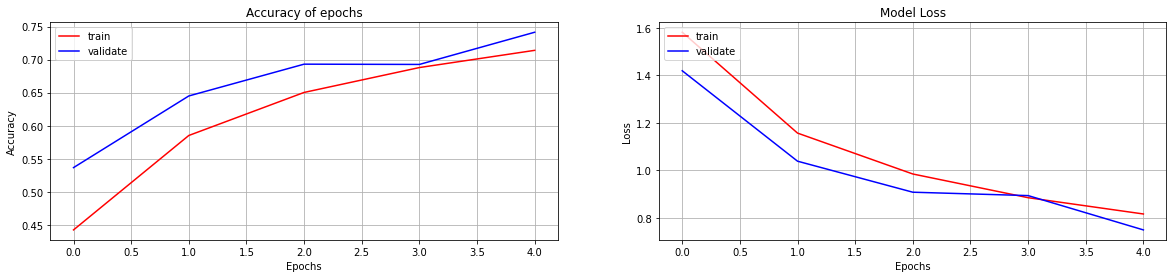

In [19]:
get_plot(history5)

В простых сетях при небольшой глубине, сложности и ширине получается низкая точность. Усложнение модели(и при добавлении слоя Dropout) приводит к улучшению метрики и вместе с тем приводит к увеличению времи обработки(на CPU).
Batch normalization и Image Augmentation дают прирост точности, однако не сильно уменьшают время обработки при CPU.